#Regresion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Minimos cuadrados

Text(0.5, 1.0, 'Dataset generado')

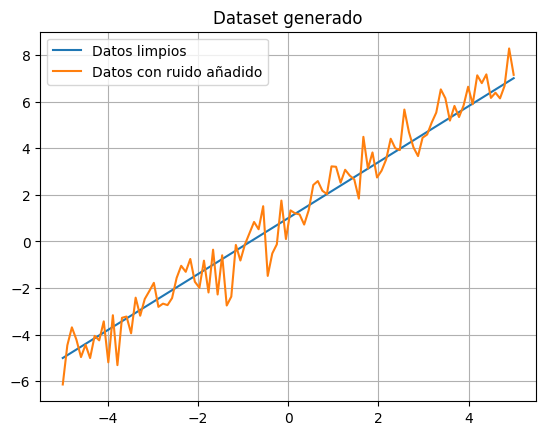

In [ ]:
#Modelo Lineal
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

In [ ]:
#Creacion del Modelo

In [ ]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.25787435 1.04943718]


Text(0.5, 1.0, 'Modelo de regresión lineal')

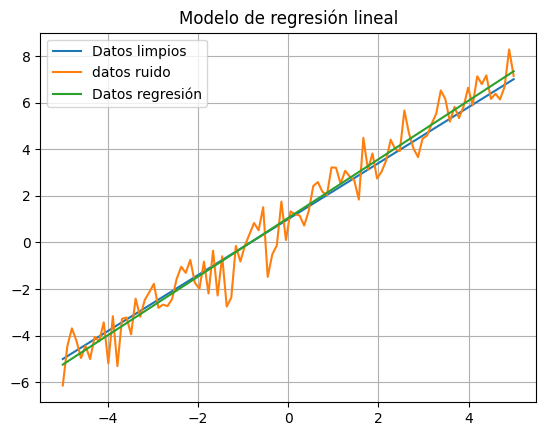

In [ ]:
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

#Dataset de Helados

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns

##Analisis Exploratorio de los datos

In [ ]:
df_helados = pd.read_csv("/content/IceCreamData.csv")
df_helados.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df_helados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


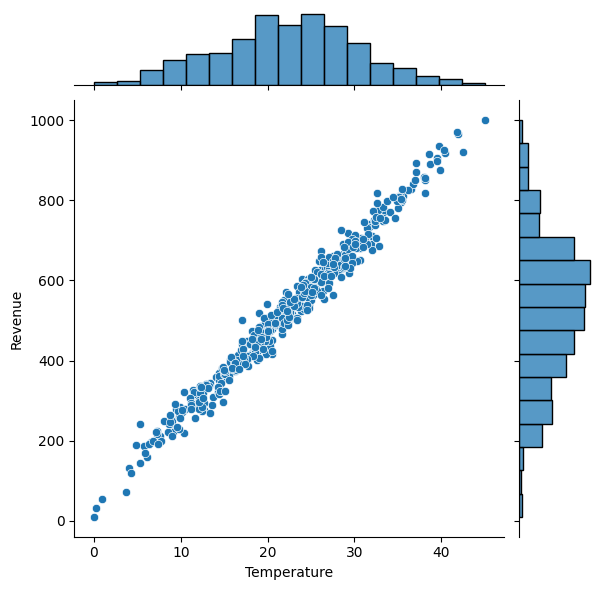

In [ ]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

##Preparacion de los datos

In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


##Modelo de regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
#Creamos el modleo
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
#el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [21.33042672], el intersecto (A) es 47.08876580350159


##Evaluacion del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

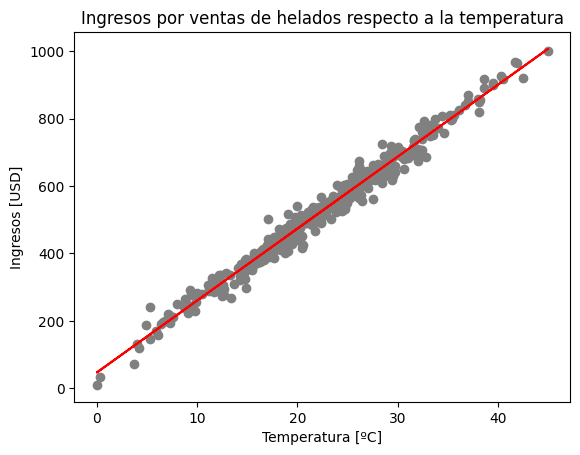

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

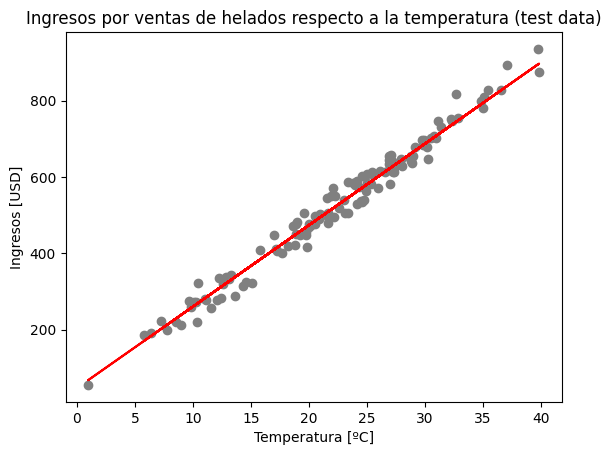

In [ ]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')


##Error medio Cuadrado

In [ ]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 620.5541978682165
Root Mean Squared Error: 24.91092527121818


##Error medio absoluto

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 19.99410888670454


##R Cuadrado

In [ ]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9793570795426839


#Regresion Polinomica


Text(0.5, 1.0, 'Dataset generado')

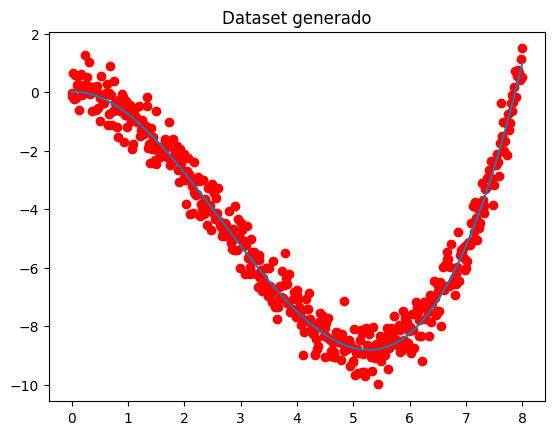

In [ ]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

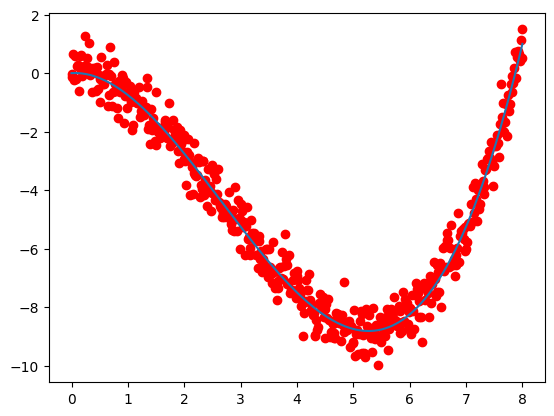

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)
